

Practice Project - 4

# Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:

    https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

### Importing required Liabraries

In [1]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Collection of data and processing

In [2]:
## Loading data from csv file to pandas DataFrame

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
# Checking sample of data by viewing first and last 5 rows of our data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Checking total number of rows and coulumns in our data

data.shape


(891, 12)

891 - Rows and 12 - Colomns

In [6]:
# Also checking some more information of our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# To check number of missing values in each column

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are total 3 columns where values are missing. Need to fill all missing fields.

#### Need to fill/correct the missing values

In [8]:
# Droping the cabin column form our data as it has major missing values also it is not required

data = data.drop(columns = 'Cabin', axis = 1)


In [9]:
# Need to replace all missing value in age column by mean value

data['Age'].fillna(data['Age'].mean(), inplace = True)

In [10]:
# Need to replace all missing value in embarked column by mode value

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [11]:
# Checking if our data is filled completly

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now there are no missing values in our data

###  DATA Analysis

Checking statistical data and analysising it


In [12]:
# Checking some statistical measures about the data

data.describe ()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Checking how many people survived and not survived

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Only 349 people survived and 549 not survived, (0) represents - not survived and (1) represents survived people

### Data Visualization

In [14]:
sns.set ()

<AxesSubplot:xlabel='Survived', ylabel='count'>

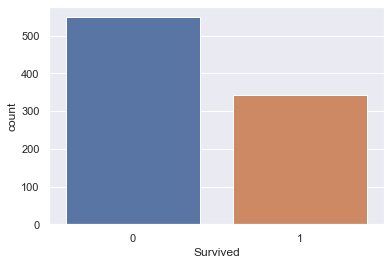

In [15]:
# Making a countplot for survived people

sns.countplot('Survived', data = data)

Only 349 people survived and 549 not survived, (0) represents - not survived and (1) represents survived people

male      577
female    314
Name: Sex, dtype: int64

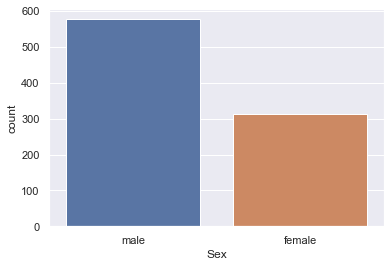

In [16]:
# checking how many were male and female

sns.countplot('Sex', data = data)
data['Sex'].value_counts()

<AxesSubplot:xlabel='Survived', ylabel='count'>

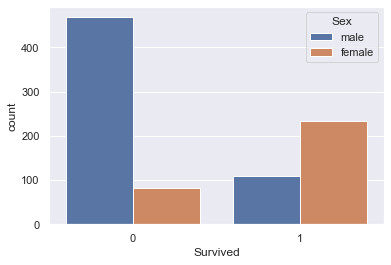

In [17]:
# checking number of survivors by gender (Male/Female)

sns.countplot('Survived', hue= 'Sex', data = data)


Female survival ration is more than male's

3    491
1    216
2    184
Name: Pclass, dtype: int64

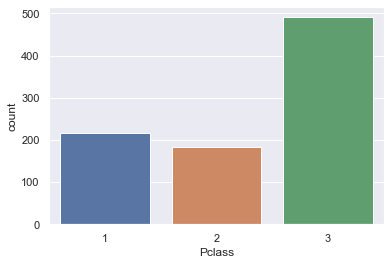

In [18]:
# Making count plot for P-Class column

sns.countplot('Pclass', data = data)
data['Pclass'].value_counts()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

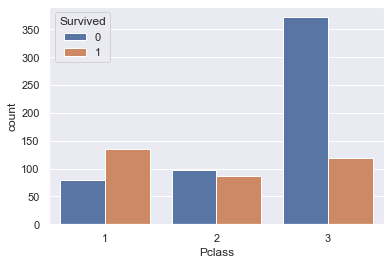

In [19]:
# checking survival of people via class

sns.countplot('Pclass', hue= 'Survived', data = data)

Ratio of not survived people is more in class 3

### Encoding our categorical columns

In [20]:
# Need to convert categorical columns to number data
# Need to update male to 0 and female to 1
# in same manner need to update S,C,Q to 0,1 and 2 respectively

data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

# checking is our data is updated
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Our categorical data is now changed

#### Sepearting features and Target and removing unnecessary and the columns which are not required


In [21]:
# We do not require columns passengerId, Name, Ticket to predict the survival so remove them from our data
# Further to check survival we will assign it to Y

X = data.drop(columns = ['PassengerId', 'Name', 'Ticket','Survived'], axis = 1)
Y = data['Survived']
print (X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [22]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Data is now separated

### Splitting data in training and testing

In [23]:
# spliting data in train test
# taken 20% of data as test data


X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.2, random_state = 2)

In [24]:
# Checking if our data is splited

print (X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training

#### Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
# Training the logistic regression model with our training data

model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

### Accuracy Score

In [27]:
# prediction of accuracy of our data 

X_train_prediction = model.predict(X_train)
print (X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [28]:
# checking accuracy of our training data

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print ('Accuracy Score of Training Data = ', training_data_accuracy)

Accuracy Score of Training Data =  0.8075842696629213


In [29]:
# Accuracy Test
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [30]:
test_data_accuracy = accuracy_score (Y_test, X_test_prediction)
print ('Accuracy score of test data = ', test_data_accuracy)

Accuracy score of test data =  0.7821229050279329


Accuracy score of training and testing data is approx similar

Now need to predict survial chances of a passanges

In [31]:
# Taking data of columns to check survival chances of a person

input_data = ( 1,1,38.000000,1,0,71.2833,1)

# Changing input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the arrary

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
# We want value for 1 particular data point this is why reshaped to (1,-1)


prediction = model.predict (input_data_reshaped)
print (prediction)

[1]


with this we are now able to predict the survial of any person